In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the data
data = pd.read_csv("/crime_data_analysis_dataset.csv")
print(data.head)


<bound method NDFrame.head of           ID Category        Date  Number of Crimes  \
0       ID_1   Type C  2018-01-01               902   
1       ID_2   Type C  2018-01-02               307   
2       ID_3   Type C  2018-01-03               776   
3       ID_4   Type A  2018-01-04               259   
4       ID_5   Type B  2018-01-05               941   
..       ...      ...         ...               ...   
995   ID_996   Type A  2020-09-22               675   
996   ID_997   Type D  2020-09-23               577   
997   ID_998   Type B  2020-09-24               672   
998   ID_999   Type B  2020-09-25               449   
999  ID_1000   Type A  2020-09-26               631   

     Crime Resolution Percentage     Label  
0                          99.37  Positive  
1                         433.72   Neutral  
2                         120.80   Neutral  
3                         159.60   Neutral  
4                         467.94  Positive  
..                           ...       

In [ ]:
# Basic info
print(data.info())

#check for missing values
print(data.isnull().sum())

# summary statistics
print(data.describe())

#Uniques values in categorical colums
print("Unique Categories:", data['Category'].unique())
print("Unique Labels:", data['Label'].unique())

# Crime avg
print("Number of Crimes avg:", data['Number of Crimes'].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1000 non-null   object 
 1   Category                     1000 non-null   object 
 2   Date                         1000 non-null   object 
 3   Number of Crimes             1000 non-null   int64  
 4   Crime Resolution Percentage  1000 non-null   float64
 5   Label                        1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None
ID                             0
Category                       0
Date                           0
Number of Crimes               0
Crime Resolution Percentage    0
Label                          0
dtype: int64
       Number of Crimes  Crime Resolution Percentage
count        1000.00000                  1000.000000
mean          498.76600                   255.

In [ ]:
#Clean the Data

# Drop rows with misiing values
data = data.dropna()

# Convert Data colum to datatime format
data['Data'] = pd.to_datetime(data['Date'])

#Check for duplicate rows
data = data.drop_duplicates()

# Validate data types
print(data.dtypes)

ID                                     object
Category                               object
Date                                   object
Number of Crimes                        int64
Crime Resolution Percentage           float64
Label                                  object
Data                           datetime64[ns]
dtype: object


In [ ]:
# Total Crimes by category
total_Number_of_Crimes_by_category = data.groupby('Category')['Number of Crimes'].sum()
print(total_Number_of_Crimes_by_category)


## Average Stay Duration by category
average_CNumber_of_Crimes_duration = data.groupby('Category')['Crime Resolution Percentage'].mean()
print(average_CNumber_of_Crimes_duration)

# Mothty Crimes Trends
data['Motht'] = data['Data'].dt.month
monthly_trends = data.groupby('Motht')['Number of Crimes'].sum()
print(monthly_trends)


Category
Type A    119814
Type B    125606
Type C    129280
Type D    124066
Name: Number of Crimes, dtype: int64
Category
Type A    250.441736
Type B    255.113864
Type C    259.590526
Type D    257.551377
Name: Crime Resolution Percentage, dtype: float64
Motht
1     47950
2     41016
3     41270
4     50903
5     42710
6     43891
7     45140
8     51083
9     44646
10    27736
11    31422
12    30999
Name: Number of Crimes, dtype: int64


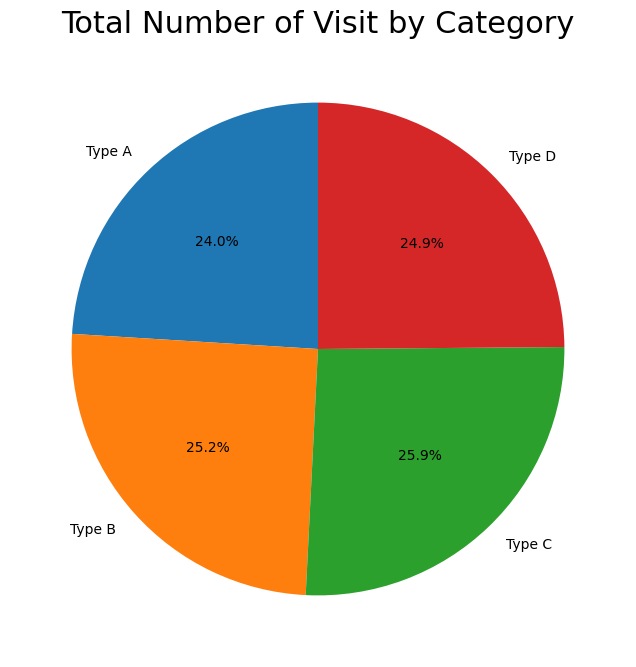

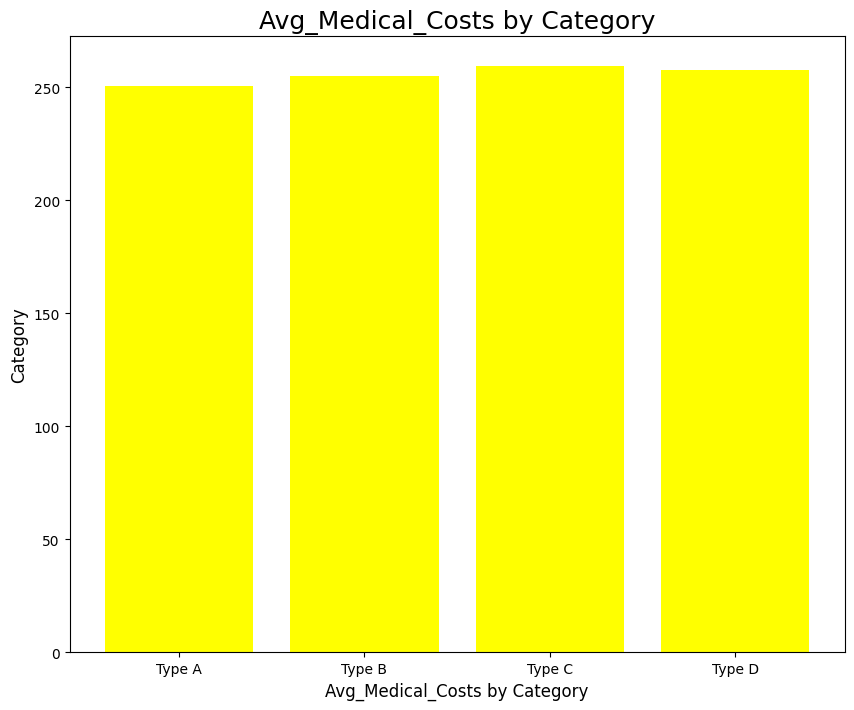

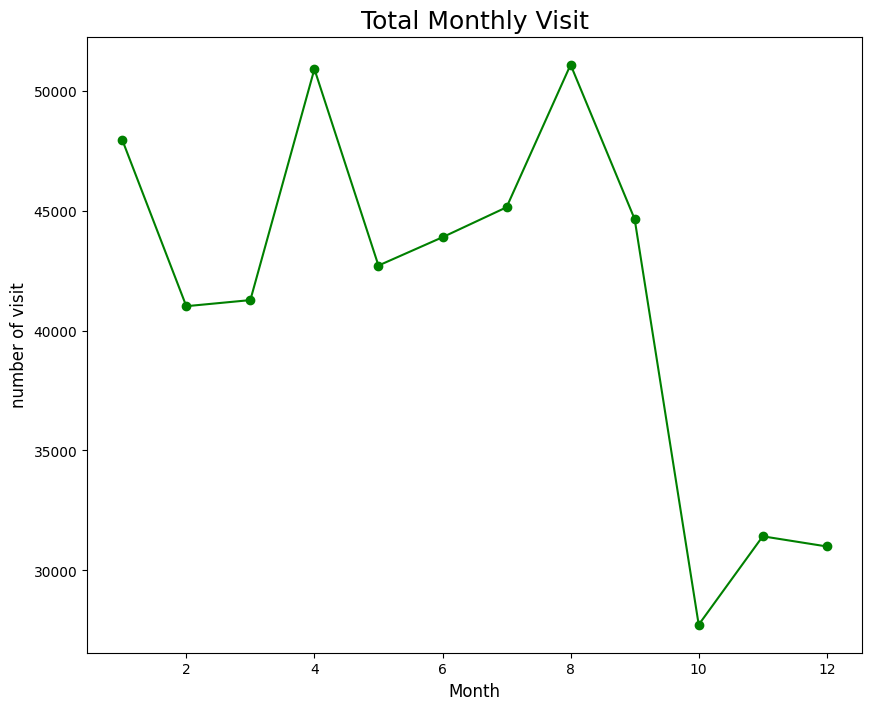

In [ ]:
# Visualization

# 1. Pie chart ---->
plt.figure(figsize=(10, 8))
plt.pie(total_Number_of_Crimes_by_category.values, labels=total_Number_of_Crimes_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title("Total Number of Visit by Category", fontsize=22)
plt.show()

# 2. bar chart ---->
plt.figure(figsize=(10, 8))
plt.bar(average_CNumber_of_Crimes_duration.index, average_CNumber_of_Crimes_duration.values, color='yellow')
plt.title("Avg_Medical_Costs by Category", fontsize=18)
plt.xlabel("Avg_Medical_Costs by Category", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

# 3. plot chart ------>
plt.figure(figsize=(10, 8))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', color='green')
plt.title("Total Monthly Visit", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("number of visit", fontsize=12)
plt.show()
